In [1]:
import os
os.getcwd()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
# importing dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train['data'] = 'train'
test['data'] = 'test'

In [7]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


In [8]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test


In [9]:
all_data = pd.concat([train,test],axis=0)

In [10]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [11]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [12]:
all_data.shape

(1309, 13)

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


## Preprocessing required

In [14]:
# check missing data
all_data.isnull().sum()/len(all_data) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [15]:
# Cabin has 77 % missing data so we drop it
all_data = all_data.drop(['Cabin'],axis=1)

In [16]:
all_data.isnull().sum()/len(all_data) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

<AxesSubplot:ylabel='Age'>

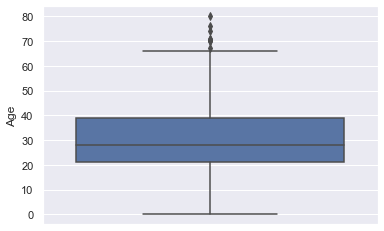

In [17]:
# Age - number (outliers but we cant consider bcz age max range is only 100)
sns.boxplot(y='Age',data = all_data)

In [18]:
all_data['Age'].mean()

29.881137667304014

In [19]:
all_data['Age'].median()

28.0

In [20]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [21]:
all_data.isnull().sum()/len(all_data) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [22]:
# Dropping PassengerID , Name , Ticket , Fare - Non significant variables

all_data = all_data.drop(['PassengerId','Name','Ticket','Fare'],axis = 1)

In [23]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [24]:
all_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [25]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [26]:
all_data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [27]:
549 +342

891

In [28]:
train.shape

(891, 13)

## Encoding required

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [30]:
all_data = pd.get_dummies(all_data,columns=['Pclass'])

In [31]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3
0,0.0,male,22.0,1,0,S,train,0,0,1
1,1.0,female,38.0,1,0,C,train,1,0,0
2,1.0,female,26.0,0,0,S,train,0,0,1
3,1.0,female,35.0,1,0,S,train,1,0,0
4,0.0,male,35.0,0,0,S,train,0,0,1


In [32]:
all_data = pd.get_dummies(all_data,columns=['Sex'])

In [33]:
all_data.head()

,Survived,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,S,train,0,0,1,0,1
1,1.0,38.0,1,0,C,train,1,0,0,1,0
2,1.0,26.0,0,0,S,train,0,0,1,1,0
3,1.0,35.0,1,0,S,train,1,0,0,1,0
4,0.0,35.0,0,0,S,train,0,0,1,0,1


In [34]:
all_data = pd.get_dummies(all_data,columns=['Embarked'])

In [35]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,0,1,0,1,0,0,1
1,1.0,38.0,1,0,train,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,train,0,0,1,1,0,0,0,1
3,1.0,35.0,1,0,train,1,0,0,1,0,0,0,1
4,0.0,35.0,0,0,train,0,0,1,0,1,0,0,1


In [36]:
all_data = all_data.drop(['Pclass_1','Sex_female','Embarked_C'],axis=1)

In [37]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,1,1,0,1
1,1.0,38.0,1,0,train,0,0,0,0,0
2,1.0,26.0,0,0,train,0,1,0,0,1
3,1.0,35.0,1,0,train,0,0,0,0,1
4,0.0,35.0,0,0,train,0,1,1,0,1


In [38]:
# outlier treatment - no outlier in datatset (Age range is correct)
# since its logistic regression hence there is no need to handle outlier

In [39]:
# Feature Scaling - Hold it , if accuracy is not good then we have to do feature scaling as well else not required

In [40]:
# splitting data back to train and test
train = all_data[all_data['data']=='train']
test= all_data[all_data['data']=='test']

In [41]:
train.shape

(891, 10)

In [42]:
test.shape

(418, 10)

In [43]:
train = train.drop(['data'],axis=1)
test = test.drop(['data'],axis = 1)

In [44]:
train.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,0,1,1,0,1
1,1.0,38.0,1,0,0,0,0,0,0
2,1.0,26.0,0,0,0,1,0,0,1
3,1.0,35.0,1,0,0,0,0,0,1
4,0.0,35.0,0,0,0,1,1,0,1


In [45]:
test.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,NaN,34.5,0,0,0,1,1,1,0
1,NaN,47.0,1,0,0,1,0,0,1
2,NaN,62.0,0,0,1,0,1,1,0
3,NaN,27.0,0,0,0,1,1,0,1
4,NaN,22.0,1,1,0,1,0,0,1


In [46]:
#Splitting data into ind v and dv
x = train.drop(['Survived'],axis = 1)
y = train['Survived']

In [47]:
x.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,0,1,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,0,1
3,35.0,1,0,0,0,0,0,1
4,35.0,0,0,0,1,1,0,1


In [48]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [49]:
x1 = test.drop(['Survived'],axis = 1)
y1 = test['Survived']

In [50]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,0,1,1,1,0
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,1,1,0
3,27.0,0,0,0,1,1,0,1
4,22.0,1,1,0,1,0,0,1


In [51]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

In [52]:
# Imbalanced data - 2*minority > majority then balanced
y.value_counts() # Balanced dataset

0.0    549
1.0    342
Name: Survived, dtype: int64

## Exploratory Data Analysis - EDA

In [53]:
for i in all_data.columns:
    print('**********************************',i,'********************')
    print()
    print(set(all_data[i].tolist()))

********************************** Survived ********************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

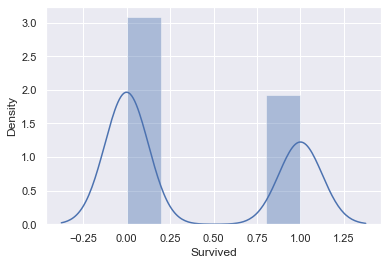

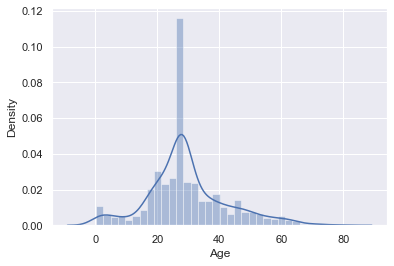

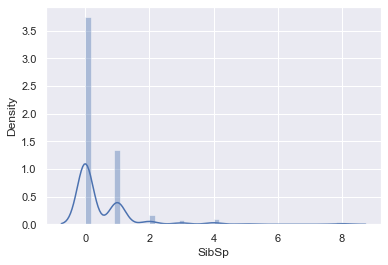

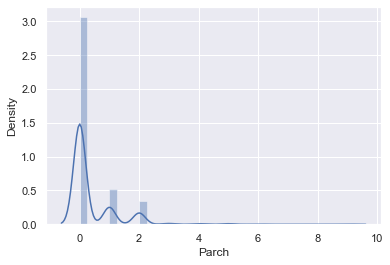

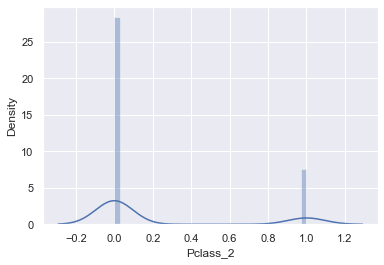

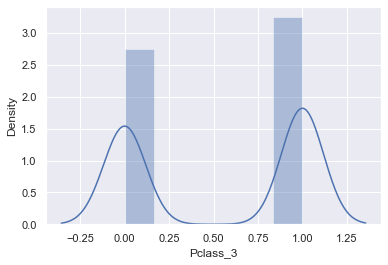

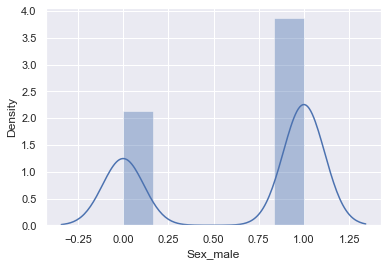

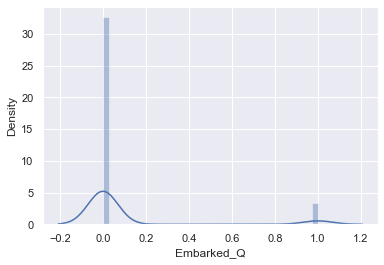

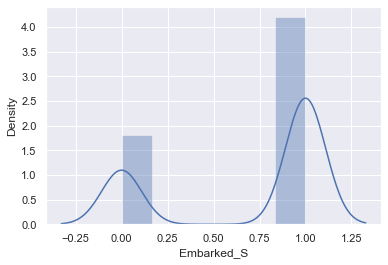

In [54]:
def distplots(col):
    sns.distplot(all_data[col])
    plt.show()

for i in list(all_data.select_dtypes(exclude=['object']).columns):
    distplots(i)

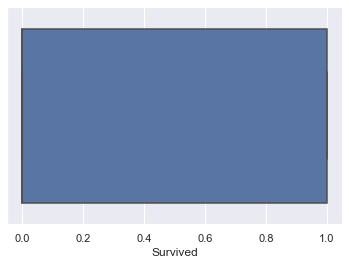

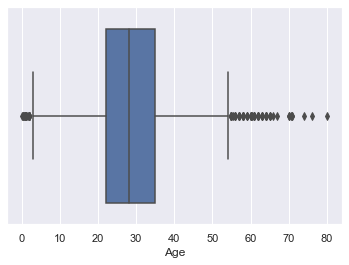

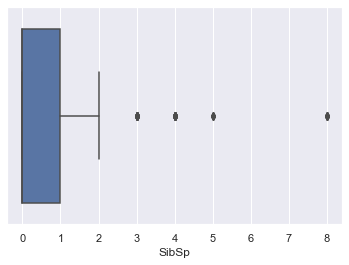

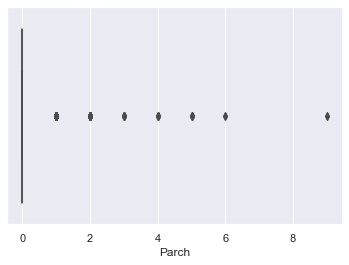

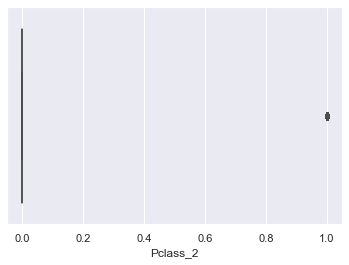

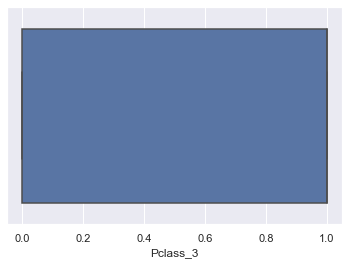

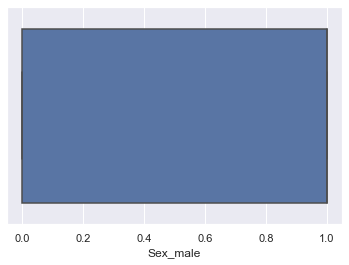

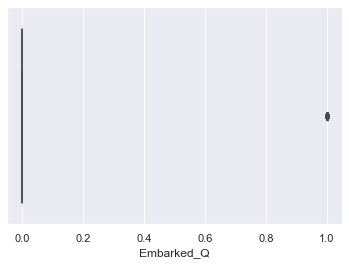

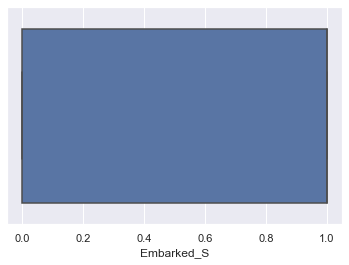

In [55]:
def boxplots(col):
    sns.boxplot(all_data[col])
    plt.show()

for i in list(all_data.select_dtypes(exclude=['object']).columns):
    boxplots(i)

<AxesSubplot:>

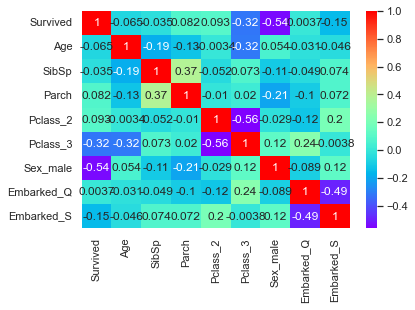

In [56]:
sns.heatmap(all_data.corr(),annot=True,cmap='rainbow')

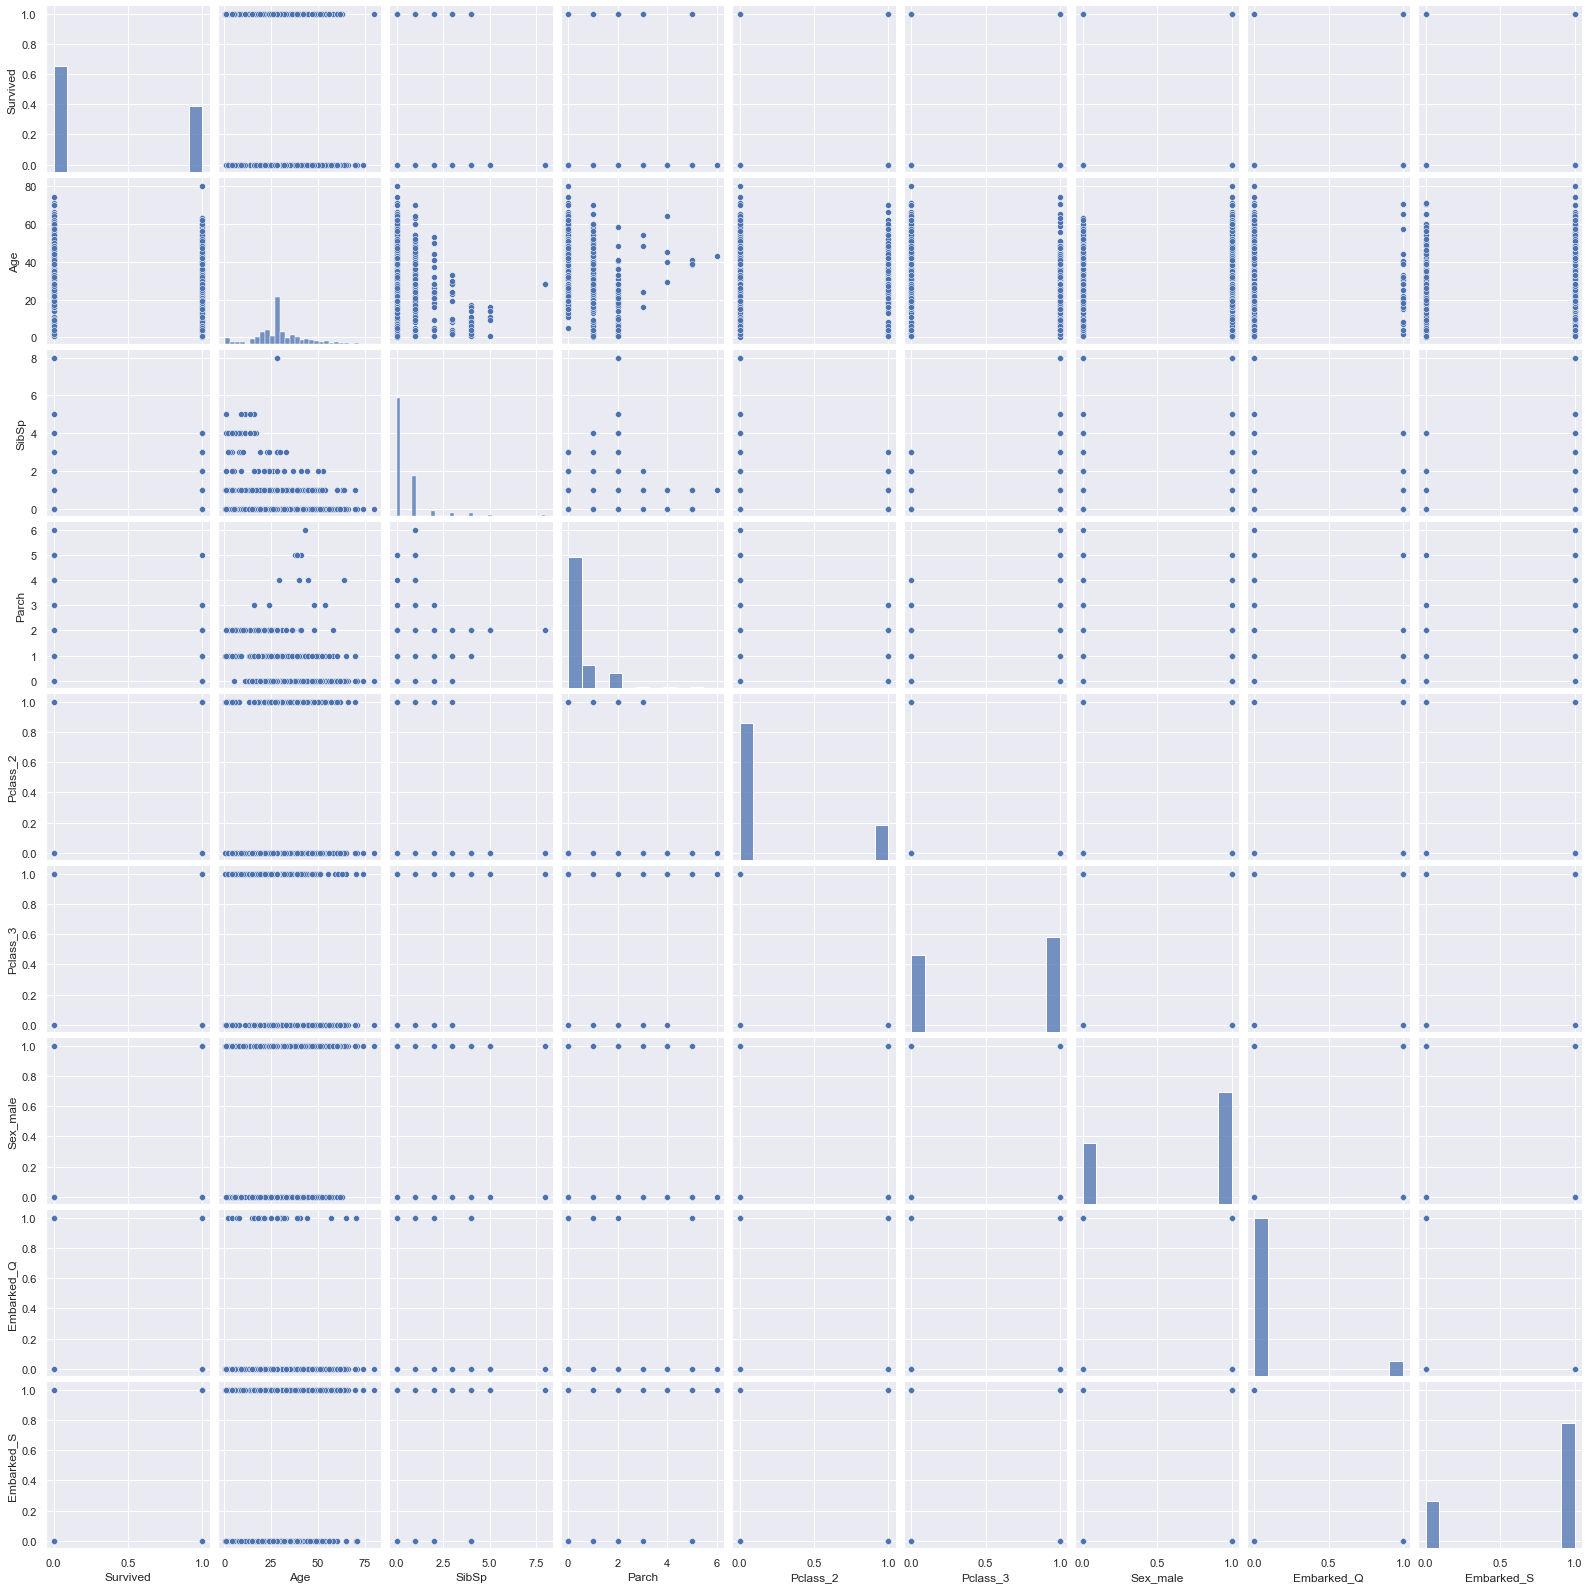

In [57]:
sns.pairplot(train)

In [58]:
# use pandas profiling

In [59]:
# split the data into train and test
# train for model building and test for model accuracy and performance
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)


## Building Logistic regression Model

In [60]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [61]:
#Predicting result
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

## Model evaluation

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [63]:
print('Confusion matrix')
confusion_matrix(y_test,y_pred_test)


Confusion matrix


array([[89, 10],
       [24, 56]], dtype=int64)

In [64]:
#accuracy
(89+56)/(89+10+24+56)

0.8100558659217877

In [65]:
print('classification_report')
print(classification_report(y_test,y_pred_test))

classification_report
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.85      0.70      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [66]:
print('Training accuracy', accuracy_score(y_train,y_pred_train))
print('**************'*5)
print('Testing accuracy', accuracy_score(y_test,y_pred_test))

Training accuracy 0.8089887640449438
**********************************************************************
Testing accuracy 0.8100558659217877


## Improving Model - cross validation (K_fold)

In [67]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model,x_test,y_test,cv=10)
accuracy

array([0.77777778, 0.94444444, 0.88888889, 0.66666667, 0.72222222,
       0.72222222, 0.72222222, 0.83333333, 0.77777778, 0.94117647])

In [68]:
print("Avg accuracy after doing 10 split",accuracy.mean())
print("******************************")

print("Best accuracy",accuracy[1])

Avg accuracy after doing 10 split 0.7996732026143791
******************************
Best accuracy 0.9444444444444444


In [69]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test,y_pred_test)


In [70]:
logistic_roc_auc

0.7994949494949495

In [71]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred_test)

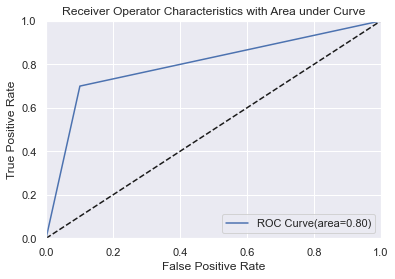

In [72]:
plt.figure()
plt.plot(fpr,tpr,label="ROC Curve(area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics with Area under Curve")
plt.legend(loc='lower right')
plt.show()

In [73]:
## Predict the test.csv data whether person will survive or not

final_result = logit_model.predict(x1)

In [74]:
final_result

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [75]:
final_report = pd.concat([x1,pd.DataFrame(final_result)],axis=1)

In [76]:
final_report

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,0
0,34.5,0,0,0,1,1,1,0,0.0
1,47.0,1,0,0,1,0,0,1,0.0
2,62.0,0,0,1,0,1,1,0,0.0
3,27.0,0,0,0,1,1,0,1,0.0
4,22.0,1,1,0,1,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,0,1,1,0,1,0.0
414,39.0,0,0,0,0,0,0,0,1.0
415,38.5,0,0,0,1,1,0,1,0.0
416,28.0,0,0,0,1,1,0,1,0.0


## Decision Tree Classifier Model

In [77]:
from sklearn.tree import DecisionTreeClassifier
#criterion = 'gini'
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred_dt_train=dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [79]:
print('Training accuracy', accuracy_score(y_train,y_pred_dt_train))
print('**************'*5)
print('Testing accuracy', accuracy_score(y_test,y_pred_dt_test))

Training accuracy 0.9410112359550562
**********************************************************************
Testing accuracy 0.770949720670391


In [80]:
# high variance (94.1 - 77.6) challenge in decision tree-overfitting(solution is bagging-randomforest)

In [81]:
#criterion='entropy'
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred_dt1_train=dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)

In [83]:
print('Training accuracy', accuracy_score(y_train,y_pred_dt1_train))
print('**************'*5)
print('Testing accuracy', accuracy_score(y_test,y_pred_dt1_test))

Training accuracy 0.9410112359550562
**********************************************************************
Testing accuracy 0.7653631284916201


In [84]:
# high variance again

## Random Forest Classifer

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [86]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [87]:
print('Training accuracy', accuracy_score(y_train,y_pred_rf_train))
print('**************'*5)
print('Testing accuracy', accuracy_score(y_test,y_pred_rf_test))

Training accuracy 0.9410112359550562
**********************************************************************
Testing accuracy 0.7988826815642458


In [88]:
## Visualization

In [89]:
from sklearn import tree

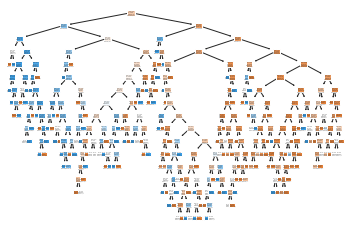

In [90]:
tree.plot_tree(dtree1,filled=True)
plt.show()

In [ ]:
## GBRegressor

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
gbc = GradientBoostingClassifier(n_estimators=500,random_state=101)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=500, random_state=101)

In [99]:
y_pred_gdb_train = gbc.predict(x_train)
y_pred_gdb_test = gbc.predict(x_test)

In [100]:
print("Train Accuracy",accuracy_score(y_train,y_pred_gdb_train))
print("Test Accuracy",accuracy_score(y_test,y_pred_gdb_test))

Train Accuracy 0.9283707865168539
Test Accuracy 0.8044692737430168
